In [41]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as mpatches

In [14]:
boroughs = gpd.read_file('statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp')

<AxesSubplot:>

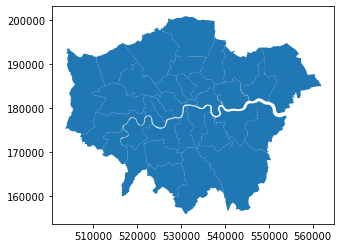

In [17]:
boroughs.plot()

In [15]:
msoas = gpd.read_file('statistical-gis-boundaries-london/ESRI/MSOA/MSOA_2011_London_gen_MHW.shp')

<AxesSubplot:>

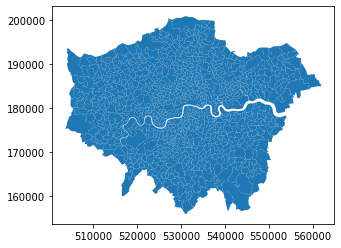

In [16]:
msoas.plot()

In [42]:
def add_north(ax, labelsize=10, loc_x=0.90, loc_y=0.95, width=0.04, height=0.13, pad=0.14):
    """
    画一个比例尺带'N'文字注释
    主要参数如下
    :param ax: 要画的坐标区域 Axes实例 plt.gca()获取即可
    :param labelsize: 显示'N'文字的大小
    :param loc_x: 以文字下部为中心的占整个ax横向比例
    :param loc_y: 以文字下部为中心的占整个ax纵向比例
    :param width: 指南针占ax比例宽度
    :param height: 指南针占ax比例高度
    :param pad: 文字符号占ax比例间隙
    :return: None
    """
    minx, maxx = ax.get_xlim()
    miny, maxy = ax.get_ylim()
    ylen = maxy - miny
    xlen = maxx - minx
    left = [minx + xlen*(loc_x - width*.5), miny + ylen*(loc_y - pad)]
    right = [minx + xlen*(loc_x + width*.5), miny + ylen*(loc_y - pad)]
    top = [minx + xlen*loc_x, miny + ylen*(loc_y - pad + height)]
    center = [minx + xlen*loc_x, left[1] + (top[1] - left[1])*.4]
    triangle = mpatches.Polygon([left, top, right, center], color='k')
    ax.text(s='N',
            x=minx + xlen*loc_x,
            y=miny + ylen*(loc_y - pad + height),
            fontsize=labelsize,
            horizontalalignment='center',
            verticalalignment='bottom')
    ax.add_patch(triangle)

In [43]:
def plt_ldn(b):
    fig, ax = plt.subplots(1, figsize=(14, 12))
    b.plot(ax=ax, edgecolor='black',facecolor='None', zorder=2)
    ax.set_xlim([502000,563000])
    ax.set_ylim([155000,201500])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    return fig, ax

/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


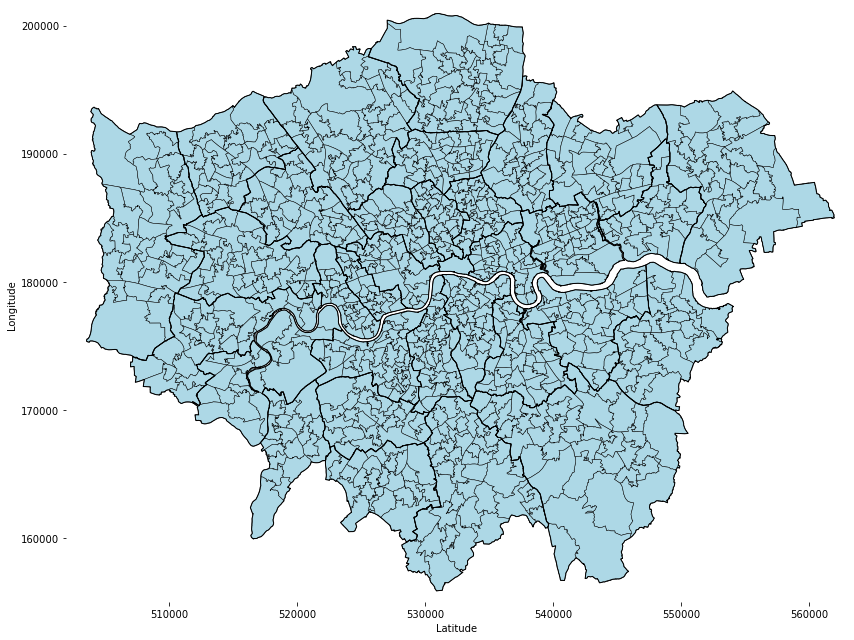

In [47]:
fig, ax = plt_ldn(boroughs)
divider = make_axes_locatable(ax)

#x, y, arrow_length = 0.85, 0.10, 0.07
#ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            #arrowprops=dict(facecolor='black', width=5, headwidth=15),
            #ha='center', va='center', fontsize=20,
            #xycoords=ax.transAxes)

#ax = add_north(ax, labelsize=10, loc_x=0.90, loc_y=0.95, width=0.04, height=0.13, pad=0.14)
msoas.plot(column='MSOA11CD', ax=ax, legend=False,color='lightblue',edgecolor='black',linewidth=.5)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.savefig('Study Area.png')

# Housing price map

In [ ]:
df = 